# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *10장 순환신경망*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 10.4 텐서플로를 이용하여 단순 RNN 모델 만들기

In [1]:
import numpy as np

size, seq_len = 100, 3
# 비어있는 넘파이 배열을 생성한다.
X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

In [2]:
import numpy as np

size, seq_len = 100, 3
# 비어있는 넘파이 배열을 생성한다.
X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

for i in range(size):
    # [0, 0.1, 0.2], [0.1, 0.2, 0.3] 같은 시퀀스를 만든다
    c = np.linspace(i/10., (i+seq_len-1)/10., seq_len)
    X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
    Y[i] = (i+seq_len) / 10   # 목표값을 생성함

for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]] 0.3
[[0.1]
 [0.2]
 [0.3]] 0.4
[[0.2]
 [0.3]
 [0.4]] 0.5
[[0.3]
 [0.4]
 [0.5]] 0.6
[[0.4]
 [0.5]
 [0.6]] 0.7
[[0.5]
 [0.6]
 [0.7]] 0.8
[[0.6]
 [0.7]
 [0.8]] 0.9
[[0.7]
 [0.8]
 [0.9]] 1.0
[[0.8]
 [0.9]
 [1. ]] 1.1
[[0.9]
 [1. ]
 [1.1]] 1.2
[[1. ]
 [1.1]
 [1.2]] 1.3
[[1.1]
 [1.2]
 [1.3]] 1.4
[[1.2]
 [1.3]
 [1.4]] 1.5
[[1.3]
 [1.4]
 [1.5]] 1.6
[[1.4]
 [1.5]
 [1.6]] 1.7
[[1.5]
 [1.6]
 [1.7]] 1.8
[[1.6]
 [1.7]
 [1.8]] 1.9
[[1.7]
 [1.8]
 [1.9]] 2.0
[[1.8]
 [1.9]
 [2. ]] 2.1
[[1.9]
 [2. ]
 [2.1]] 2.2
[[2. ]
 [2.1]
 [2.2]] 2.3
[[2.1]
 [2.2]
 [2.3]] 2.4
[[2.2]
 [2.3]
 [2.4]] 2.5
[[2.3]
 [2.4]
 [2.5]] 2.6
[[2.4]
 [2.5]
 [2.6]] 2.7
[[2.5]
 [2.6]
 [2.7]] 2.8
[[2.6]
 [2.7]
 [2.8]] 2.9
[[2.7]
 [2.8]
 [2.9]] 3.0
[[2.8]
 [2.9]
 [3. ]] 3.1
[[2.9]
 [3. ]
 [3.1]] 3.2
[[3. ]
 [3.1]
 [3.2]] 3.3
[[3.1]
 [3.2]
 [3.3]] 3.4
[[3.2]
 [3.3]
 [3.4]] 3.5
[[3.3]
 [3.4]
 [3.5]] 3.6
[[3.4]
 [3.5]
 [3.6]] 3.7
[[3.5]
 [3.6]
 [3.7]] 3.8
[[3.6]
 [3.7]
 [3.8]] 3.9
[[3.7]
 [3.8]
 [3.9]] 4.0
[[3.8]
 [3.9

In [3]:
import tensorflow as tf
# units는 SimpleRNN 레이어에 있는 뉴런의 수
# return_sequences는 출력으로 시퀀스 전체를 출력할지 묻는 옵션
# input_shape [3, 1]에서 3는 timesteps, 1은 입력차원
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 20, return_sequences=False,
                              input_shape=[3, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer ='adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                440       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


### 10.5 RNN을 학습시켜 예측을 해 보자.

In [4]:
import matplotlib.pyplot as plt
history = model.fit(X, Y, epochs=300)


Epoch 1/300
4/4 [==============================] - 1s 5ms/step - loss: 47.6526
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 45.6392
Epoch 3/300
4/4 [==============================] - 0s 7ms/step - loss: 43.6392
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 41.6371
Epoch 5/300
4/4 [==============================] - 0s 8ms/step - loss: 39.6652
Epoch 6/300
4/4 [==============================] - 0s 8ms/step - loss: 37.7050
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 35.7916
Epoch 8/300
4/4 [==============================] - 0s 9ms/step - loss: 33.8569
Epoch 9/300
4/4 [==============================] - 0s 5ms/step - loss: 31.9072
Epoch 10/300
4/4 [==============================] - 0s 5ms/step - loss: 29.9545
Epoch 11/300
4/4 [==============================] - 0s 5ms/step - loss: 28.0301
Epoch 12/300
4/4 [==============================] - 0s 6ms/step - loss: 26.0129
Epoch 13/300
4/4 [==============================]

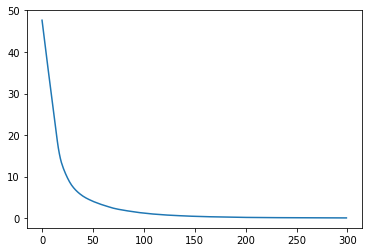

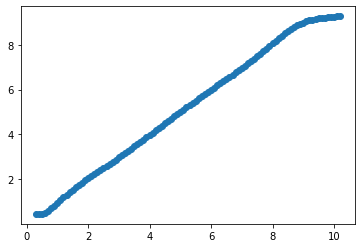

In [5]:
plt.plot(history.history['loss'])
plt.show()
y_hat = model.predict(X)
plt.scatter(Y, y_hat)
plt.show()

In [6]:
print(model.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model.predict(np.array([[[10.4], [10.5], [10.6]]])))

[[9.290602]]
[[9.298561]]


In [7]:
# 유닛의 수를 256개로 대폭 늘여서 개선된 모델
model256 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 256, return_sequences=False,
                              input_shape=[3, 1]),
    tf.keras.layers.Dense(1)
])

model256.compile(optimizer ='adam', loss = 'mse')
model256.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
4/4 [==============================] - 1s 5ms/step - loss: 12.7435
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 4.9610
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 2.2785
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 2.8903
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 1.2674
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 1.5654
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 0.9249
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5369
Epoch 9/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4320
Epoch 10/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3316
Epoch 11/300
4/4 [==============================] - 0s 7ms/step - loss: 0.2144
Epoch 12/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1854
Epoch 13/300
4/4 [==============================] - 0s 6ms/s

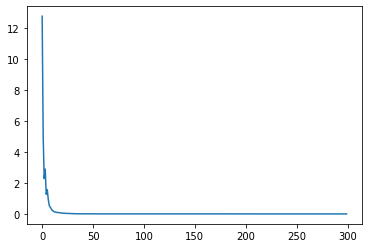

In [8]:
history = model256.fit(X, Y, epochs=300)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

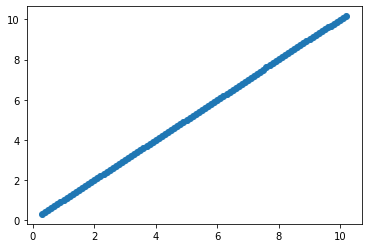

In [9]:
y_hat = model256.predict(X)
plt.scatter(Y, y_hat)

In [10]:
print(model256.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model256.predict(np.array([[[10.4], [10.5], [10.6]]])))

[[10.430711]]
[[10.60503]]


### 10.6 RNN을 다층구조로 만들어 적은 수의 파라미터로 좋은 성능을 내자

In [11]:
import tensorflow as tf

model_multilayer = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 34, input_shape=[3, 1],
                                          return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34),
    tf.keras.layers.Dense(1) ])
model_multilayer.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 3, 34)             1224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 3, 34)             2346      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 3, 34)             2346      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 34)                2346      
                                                                 
 dense_2 (Dense)             (None, 1)                 35        
                                                                 
Total params: 8,297
Trainable params: 8,297
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
4/4 [==============================] - 3s 7ms/step - loss: 37.4856
Epoch 2/300
4/4 [==============================] - 0s 9ms/step - loss: 19.5444
Epoch 3/300
4/4 [==============================] - 0s 8ms/step - loss: 11.6344
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 8.2853
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 6.6208
Epoch 6/300
4/4 [==============================] - 0s 7ms/step - loss: 5.7004
Epoch 7/300
4/4 [==============================] - 0s 10ms/step - loss: 4.9997
Epoch 8/300
4/4 [==============================] - 0s 7ms/step - loss: 4.3573
Epoch 9/300
4/4 [==============================] - 0s 8ms/step - loss: 3.7744
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 3.2059
Epoch 11/300
4/4 [==============================] - 0s 7ms/step - loss: 2.7203
Epoch 12/300
4/4 [==============================] - 0s 6ms/step - loss: 2.3586
Epoch 13/300
4/4 [==============================] - 0s 7m

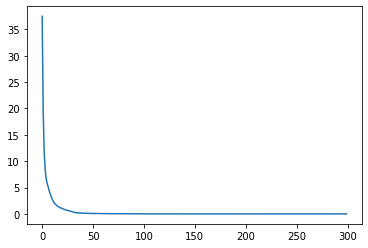

In [12]:
model_multilayer.compile(optimizer ='adam', loss = 'mse')
history = model_multilayer.fit(X, Y, epochs=300)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

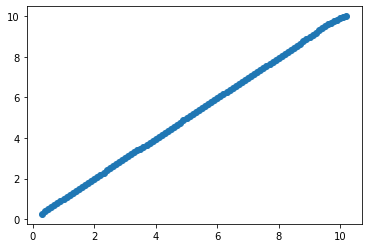

In [13]:
y_hat = model_multilayer.predict(X)
plt.scatter(Y, y_hat)

In [14]:
print(model_multilayer.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model_multilayer.predict(np.array([[[10.4], [10.5], [10.6]]])))

[[10.111757]]
[[10.160634]]


### 10.12 단순 RNN과 LSTM, GRU 모델의 비교 (1) - 시퀀스 데이터 준비

In [15]:
import numpy as np

# 0.0, 0.1, .. 증가하는 시퀀스 데이터를 생성함
# seq_len 길이를 가지는 시퀀스 데이터를 size 갯수만큼 생성한다
def sequence_gen(size, seq_len):
    # 비어있는 넘파이 배열을 생성한다.
    seq_X = np.empty(shape=(size, seq_len, 1))
    Y = np.empty(shape=(size,))

    for i in range(size):
        # [0, 0.1, 0.2, .. ]같은 시퀀스와 Y 값을 size 갯수만큼 생성
        c = np.linspace(i/10, (i+seq_len-1)/10, seq_len)
        seq_X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
        Y[i] = (i+seq_len) / 10       # 목표값을 생성함

    return seq_X, Y

# 길이가 16인 시퀀스 8개를 훈련용으로 만든다
n, seq_len = 8, 16   
train_seq_X, train_Y = sequence_gen(n, seq_len)

In [16]:
print('훈련용 데이터')
for i in range(n):
    print(train_seq_X[i].flatten(), train_Y[i])

half_n, offset = int(n/2), 1.0
test_seq_X = train_seq_X[:half_n] + offset
test_Y = train_Y[:half_n] + offset

print('검증용 데이터')
for i in range(half_n):
    print(test_seq_X[i].flatten(), test_Y[i])

훈련용 데이터
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 1.6
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6] 1.7
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7] 1.8
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 1.9
[0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9] 2.0
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 2.1
[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1] 2.2
[0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 2.3
검증용 데이터
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5] 2.6
[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6] 2.7
[1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 2.8
[1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8] 2.9


### 10.13 단순 RNN과 LSTM, GRU 모델의 비교 (1) - 성능 비교

In [17]:
import tensorflow as tf
n_units = 256
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = n_units, return_sequences=False,
                              input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.fit(train_seq_X, train_Y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 799ms/step - loss: 3.9148
Epoch 2/200
1/1 [==============================] - 0s 16ms/step - loss: 0.0149
Epoch 3/200
1/1 [==============================] - 0s 18ms/step - loss: 0.9772
Epoch 4/200
1/1 [==============================] - 0s 17ms/step - loss: 0.2848
Epoch 5/200
1/1 [==============================] - 0s 16ms/step - loss: 0.0508
Epoch 6/200
1/1 [==============================] - 0s 18ms/step - loss: 0.3326
Epoch 7/200
1/1 [==============================] - 0s 17ms/step - loss: 0.2449
Epoch 8/200
1/1 [==============================] - 0s 19ms/step - loss: 0.0560
Epoch 9/200
1/1 [==============================] - 0s 17ms/step - loss: 0.0062
Epoch 10/200
1/1 [==============================] - 0s 22ms/step - loss: 0.0770
Epoch 11/200
1/1 [==============================] - 0s 17ms/step - loss: 0.1236
Epoch 12/200
1/1 [==============================] - 0s 19ms/step - loss: 0.0823
Epoch 13/200
1/1 [==============================

In [18]:
result = simpleRNN_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

예측값 : [2.5113606 2.5782747 2.6406264 2.6985714]
실제값 : [2.6 2.7 2.8 2.9]


In [19]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = n_units, return_sequences=False,
                         input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.fit(train_seq_X, train_Y, epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 3.8860
Epoch 2/200
1/1 [==============================] - 0s 43ms/step - loss: 2.8576
Epoch 3/200
1/1 [==============================] - 0s 43ms/step - loss: 1.9872
Epoch 4/200
1/1 [==============================] - 0s 47ms/step - loss: 1.2225
Epoch 5/200
1/1 [==============================] - 0s 41ms/step - loss: 0.5611
Epoch 6/200
1/1 [==============================] - 0s 43ms/step - loss: 0.0939
Epoch 7/200
1/1 [==============================] - 0s 52ms/step - loss: 0.1246
Epoch 8/200
1/1 [==============================] - 0s 44ms/step - loss: 0.4962
Epoch 9/200
1/1 [==============================] - 0s 38ms/step - loss: 0.3582
Epoch 10/200
1/1 [==============================] - 0s 46ms/step - loss: 0.1081
Epoch 11/200
1/1 [==============================] - 0s 45ms/step - loss: 0.0087
Epoch 12/200
1/1 [==============================] - 0s 43ms/step - loss: 0.0326
Epoch 13/200
1/1 [==============================] -

In [20]:
result = LSTM_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

예측값 : [2.5472264 2.6265173 2.70305   2.776919 ]
실제값 : [2.6 2.7 2.8 2.9]


In [21]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = n_units, return_sequences=False, 
                        input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

GRU_model.compile(optimizer ='adam', loss = 'mse')
GRU_model.fit(train_seq_X, train_Y, epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 3.2312
Epoch 2/200
1/1 [==============================] - 0s 39ms/step - loss: 2.3663
Epoch 3/200
1/1 [==============================] - 0s 42ms/step - loss: 1.6096
Epoch 4/200
1/1 [==============================] - 0s 36ms/step - loss: 0.9602
Epoch 5/200
1/1 [==============================] - 0s 37ms/step - loss: 0.4363
Epoch 6/200
1/1 [==============================] - 0s 40ms/step - loss: 0.0881
Epoch 7/200
1/1 [==============================] - 0s 42ms/step - loss: 0.0163
Epoch 8/200
1/1 [==============================] - 0s 40ms/step - loss: 0.2634
Epoch 9/200
1/1 [==============================] - 0s 44ms/step - loss: 0.3996
Epoch 10/200
1/1 [==============================] - 0s 44ms/step - loss: 0.3001
Epoch 11/200
1/1 [==============================] - 0s 47ms/step - loss: 0.1458
Epoch 12/200
1/1 [==============================] - 0s 36ms/step - loss: 0.0422
Epoch 13/200
1/1 [==============================] -

In [22]:
result = GRU_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

예측값 : [2.576889  2.670672  2.763801  2.8562686]
실제값 : [2.6 2.7 2.8 2.9]


### LAB 10-1 비선형 시퀀스를 순환신경망으로 예측하자

In [23]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 100, 10
# 비어있는 넘파이 배열을 생성한다.
seq_X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

In [24]:
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [25]:
shift = np.random.randn(size) # 시퀀스 추출에 사용할 구간을 옮겨 놓는 값
for i in range(size):
    seq_X[i,:,:] = np.sin(shift[i] + interval[:-1]).reshape(seq_len, 1)
    Y[i] = np.sin(shift[i] + interval[-1])

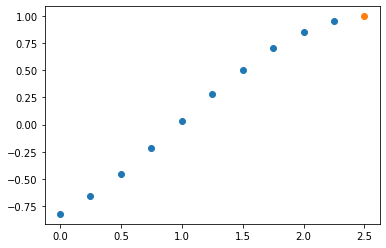

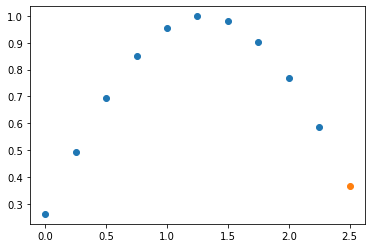

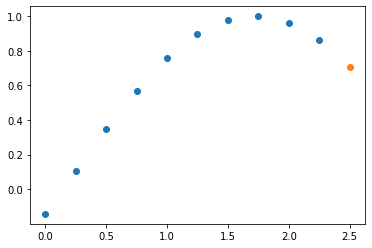

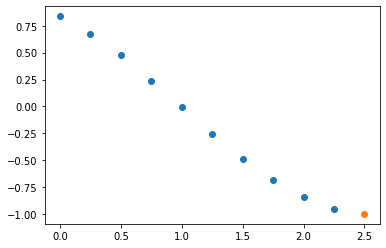

In [26]:
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :,:])
    plt.scatter(interval[-1], Y[i])
    plt.show()

In [27]:
train_X = seq_X[:80]
train_y = Y[:80]
test_X = seq_X[80:]
test_y = Y[80:]

In [28]:
import tensorflow as tf
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False,
                              input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])
simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
3/3 [==============================] - 1s 7ms/step - loss: 1.0535
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 0.9770
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 0.9021
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 0.8320
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.7664
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 0.7029
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6454
Epoch 8/50
3/3 [==============================] - 0s 6ms/step - loss: 0.5885
Epoch 9/50
3/3 [==============================] - 0s 6ms/step - loss: 0.5379
Epoch 10/50
3/3 [==============================] - 0s 6ms/step - loss: 0.4872
Epoch 11/50
3/3 [==============================] - 0s 6ms/step - loss: 0.4409
Epoch 12/50
3/3 [==============================] - 0s 6ms/step - loss: 0.3974
Epoch 13/50
3/3 [==============================] - 0s 6ms/step - loss: 0.

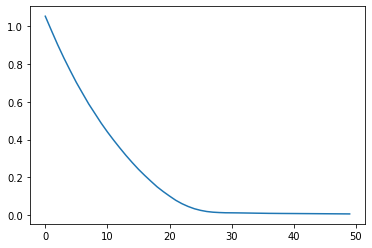

In [29]:
history = simpleRNN_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])

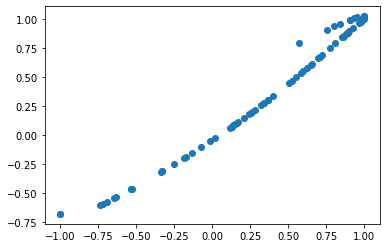

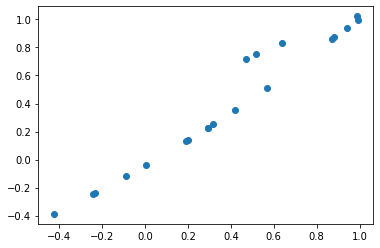

In [30]:
train_y_hat = simpleRNN_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = simpleRNN_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

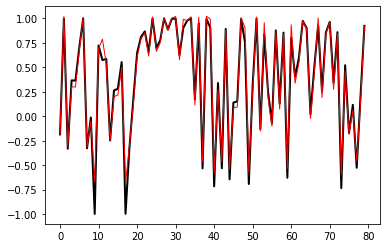

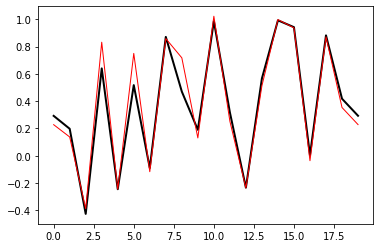

In [31]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)
plt.show()

In [32]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 10, return_sequences=False,
                         input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                480       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
3/3 [==============================] - 2s 8ms/step - loss: 0.3150
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2985
Epoch 3/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2848
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2717
Epoch 5/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2602
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2508
Epoch 7/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2413
Epoch 8/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2324
Epoch 9/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2242
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2165
Epoch 11/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2087
Epoch 12/50
3/3 [==============================] - 0s 10ms/step - loss: 0.2007
Epoch 13/50
3/3 [==============================] - 0s 7ms/step - loss: 0

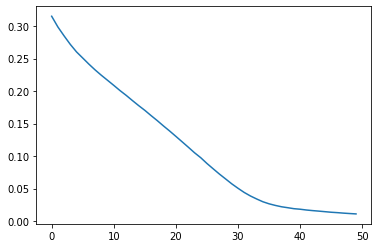

In [33]:
history = LSTM_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])

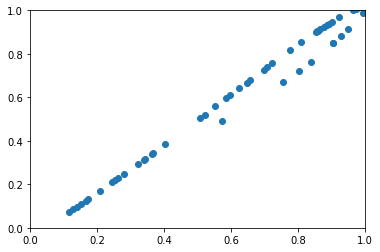

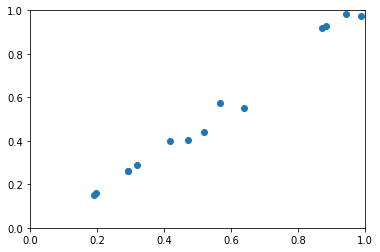

In [34]:
train_y_hat = LSTM_model.predict(train_X)
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(train_y, train_y_hat)
plt.show()
plt.xlim([0,1])
plt.ylim([0,1])
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

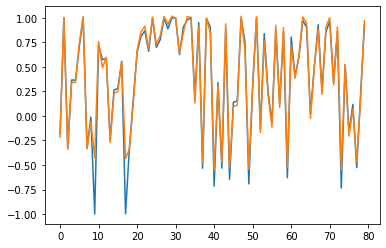

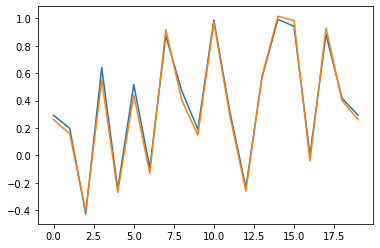

In [35]:
plt.plot(train_y)
plt.plot(train_y_hat)
plt.show()
plt.plot(test_y)
plt.plot(test_y_hat)

In [54]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 10, return_sequences=False, 
                        input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])
GRU_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 10)                390       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
3/3 [==============================] - 2s 8ms/step - loss: 0.5992
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 0.5537
Epoch 3/50
3/3 [==============================] - 0s 8ms/step - loss: 0.5122
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.4728
Epoch 5/50
3/3 [==============================] - 0s 9ms/step - loss: 0.4358
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.4051
Epoch 7/50
3/3 [==============================] - 0s 8ms/step - loss: 0.3782
Epoch 8/50
3/3 [==============================] - 0s 8ms/step - loss: 0.3528
Epoch 9/50
3/3 [==============================] - 0s 8ms/step - loss: 0.3297
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss: 0.3112
Epoch 11/50
3/3 [==============================] - 0s 11ms/step - loss: 0.2957
Epoch 12/50
3/3 [==============================] - 0s 9ms/step - loss: 0.2813
Epoch 13/50
3/3 [==============================] - 0s 9ms/step - loss: 0

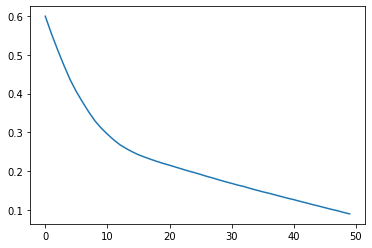

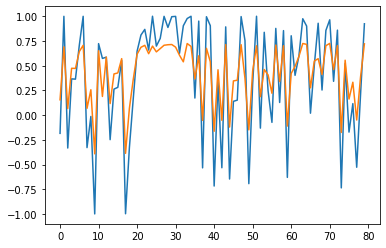

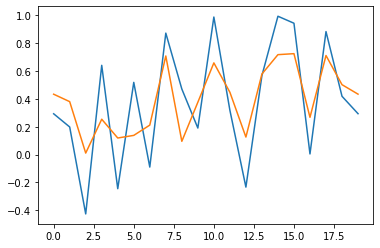

In [37]:
GRU_model.compile(optimizer ='adam', loss = 'mse')
history = GRU_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])
plt.show()

train_y_hat = GRU_model.predict(train_X)
test_y_hat = GRU_model.predict(test_X)
plt.plot(train_y)
plt.plot(train_y_hat)
plt.show()
plt.plot(test_y)
plt.plot(test_y_hat)
plt.show()

### LAB 10-2 기억이 필요한 시퀀스를 예측해 보자

In [38]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 200, 30
# 비어있는 넘파이 배열을 생성한다.
# 이번에 생성할 데이터는 시퀀스에 인덱스가 있다
seq_X = np.empty(shape=(size, seq_len, 2))
Y = np.empty(shape=(size,))

In [39]:
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [40]:
shift = np.random.randn(size)
for i in range(size):  # 시퀀스 내의 각 원소에 대해 인덱스와 값을 설정
    seq_X[i,:,0] = np.random.randint(0, 6, size=(seq_len)) # 인덱스 
    seq_X[i,:,1] = np.sin(shift[i] + interval[:-1])        # 값 
    # label은 시퀀스 내에서 짝수 인덱스를 가진 원소의 값을 모두 더한 값
    even_idx = seq_X[i, seq_X[i,:,0]%2 == 0 ]
    Y[i] = even_idx[:,1].sum()

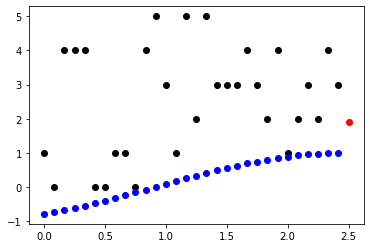

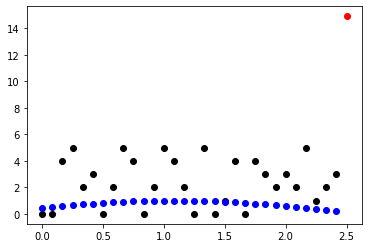

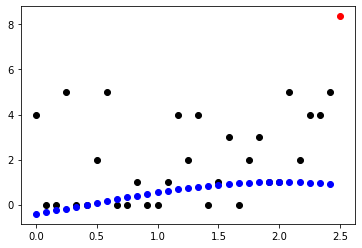

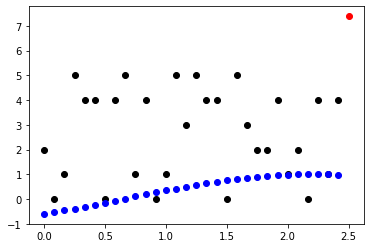

In [41]:
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :, 0], color='k') # 인덱스 정보
    plt.scatter(interval[:-1], seq_X[i, :, 1], color='b') # 값: 사인 시퀀스
    plt.scatter(interval[-1], Y[i], color='r')
    plt.show()

In [42]:
train_X = seq_X[:180]
train_y = Y[:180]
test_X = seq_X[180:]
test_y = Y[180:]

In [43]:
import tensorflow as tf
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False,
                              input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])
simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 10)                130       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 1s 7ms/step - loss: 82.6705
Epoch 2/150
6/6 [==============================] - 0s 9ms/step - loss: 80.8998
Epoch 3/150
6/6 [==============================] - 0s 6ms/step - loss: 79.1493
Epoch 4/150
6/6 [==============================] - 0s 8ms/step - loss: 77.5879
Epoch 5/150
6/6 [==============================] - 0s 6ms/step - loss: 76.1226
Epoch 6/150
6/6 [==============================] - 0s 7ms/step - loss: 74.6505
Epoch 7/150
6/6 [==============================] - 0s 11ms/step - loss: 73.3026
Epoch 8/150
6/6 [==============================] - 0s 8ms/step - loss: 71.9454
Epoch 9/150
6/6 [==============================] - 0s 9ms/step - loss: 70.6069
Epoch 10/150
6/6 [==============================] - 0s 9ms/step - loss: 69.3256
Epoch 11/150
6/6 [==============================] - 0s 7ms/step - loss: 67.9745
Epoch 12/150
6/6 [==============================] - 0s 7ms/step - loss: 66.7319
Epoch 13/150
6/6 [==============================

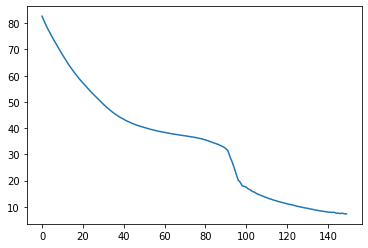

In [44]:
history = simpleRNN_model.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])

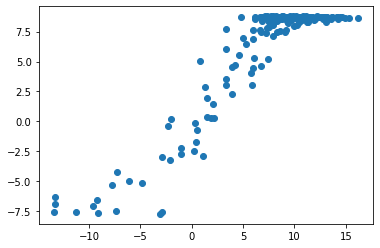

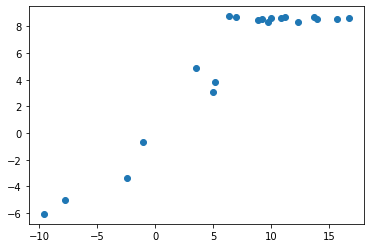

In [45]:
train_y_hat = simpleRNN_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = simpleRNN_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

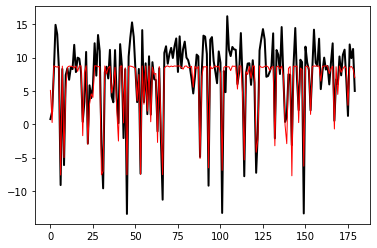

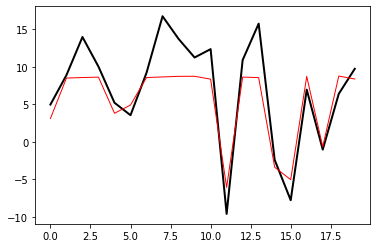

In [46]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

In [47]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 10, return_sequences=False,
                         input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10)                520       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 5s 28ms/step - loss: 74.8631
Epoch 2/150
6/6 [==============================] - 0s 24ms/step - loss: 73.5475
Epoch 3/150
6/6 [==============================] - 0s 26ms/step - loss: 72.2585
Epoch 4/150
6/6 [==============================] - 0s 22ms/step - loss: 70.9306
Epoch 5/150
6/6 [==============================] - 0s 18ms/step - loss: 69.5544
Epoch 6/150
6/6 [==============================] - 0s 19ms/step - loss: 68.1231
Epoch 7/150
6/6 [==============================] - 0s 23ms/step - loss: 66.5422
Epoch 8/150
6/6 [==============================] - 0s 19ms/step - loss: 64.8249
Epoch 9/150
6/6 [==============================] - 0s 19ms/step - loss: 62.9177
Epoch 10/150
6/6 [==============================] - 0s 25ms/step - loss: 60.7747
Epoch 11/150
6/6 [==============================] - 0s 31ms/step - loss: 58.5167
Epoch 12/150
6/6 [==============================] - 0s 26ms/step - loss: 56.1879
Epoch 13/150
6/6 [===================

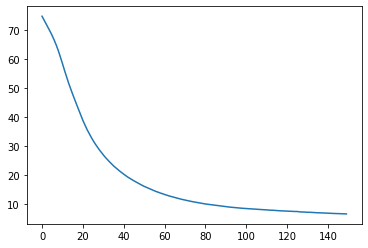

In [48]:
history = LSTM_model.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])

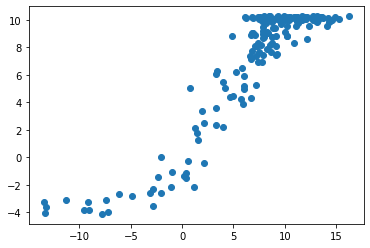

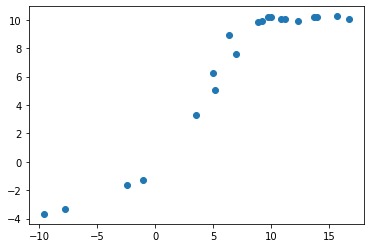

In [49]:
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

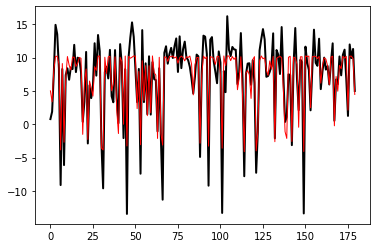

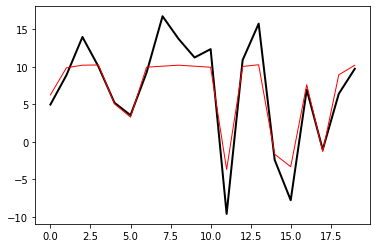

In [50]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

In [51]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 10, return_sequences=False, 
                        input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

In [52]:
GRU_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 10)                420       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 2s 15ms/step - loss: 98.3079
Epoch 2/150
6/6 [==============================] - 0s 17ms/step - loss: 96.7234
Epoch 3/150
6/6 [==============================] - 0s 14ms/step - loss: 95.2232
Epoch 4/150
6/6 [==============================] - 0s 15ms/step - loss: 93.7813
Epoch 5/150
6/6 [==============================] - 0s 15ms/step - loss: 92.4052
Epoch 6/150
6/6 [==============================] - 0s 15ms/step - loss: 91.0278
Epoch 7/150
6/6 [==============================] - 0s 18ms/step - loss: 89.7757
Epoch 8/150
6/6 [==============================] - 0s 15ms/step - loss: 88.5392
Epoch 9/150
6/6 [==============================] - 0s 15ms/step - loss: 87.3216
Epoch 10/150
6/6 [==============================] - 0s 14ms/step - loss: 86.1071
Epoch 11/150
6/6 [==============================] - 0s 16ms/step - loss: 84.8439
Epoch 12/150
6/6 [==============================] - 0s 17ms/step - loss: 83.6797
Epoch 13/150
6/6 [===================

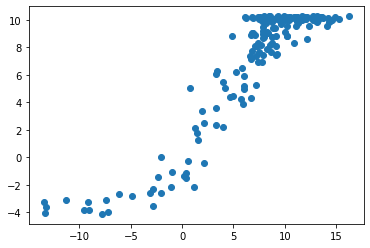

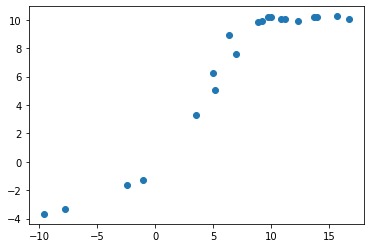

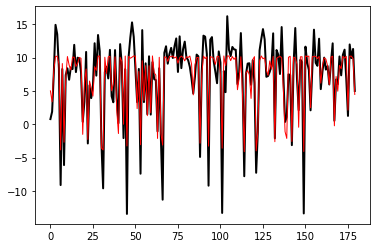

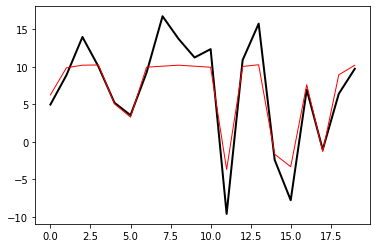

In [53]:

GRU_model.compile(optimizer ='adam', loss = 'mse')
GRU_model.fit(train_X, train_y, epochs=150)
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)